# Patterns in Twitch Streamers page

I decided to put my newly acquired data analytics skills to the test by analyzing an idea I had as a gamer and a viewer of twitch streams. Specifically, I wanted to identify patterns among the streams that successfully attract a large number of viewers and maintain high engagement.

Some of the key questions I aimed to answer 


- Are the most streamed games the best ones by views count?
- Does the language of the stream affect the number of views and followers ?
- Does the Stream duration affect the number of views and followers ?
- What is the best days for gaining followers and viewers?

I will try through the data available in [hibrahimag1 dataset](https://www.kaggle.com/hibrahimag1) to find any correlation or patterns.

In [1]:
# Import section
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

#Import Dataset 
df = pd.read_csv('twitch_streamers.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RANK                            999 non-null    int64  
 1   NAME                            999 non-null    object 
 2   LANGUAGE                        999 non-null    object 
 3   TYPE                            999 non-null    object 
 4   MOST_STREAMED_GAME              999 non-null    object 
 5   2ND_MOST_STREAMED_GAME          922 non-null    object 
 6   AVERAGE_STREAM_DURATION         999 non-null    float64
 7   FOLLOWERS_GAINED_PER_STREAM     999 non-null    int64  
 8   AVG_VIEWERS_PER_STREAM          999 non-null    int64  
 9   AVG_GAMES_PER_STREAM            999 non-null    float64
 10  TOTAL_TIME_STREAMED             999 non-null    int64  
 11  TOTAL_FOLLOWERS                 999 non-null    int64  
 12  TOTAL_VIEWS                     999 

In [2]:
df.head()

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18405,15852,2.3,4698,10600000,9150000,194,3.6,Friday,Saturday
1,2,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3386,1145,1.2,8407,5760000,1950000,54,5.6,Tuesday,Sunday
2,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689,12331,1.3,6728,797000,14200000,111,2.8,Thursday,Sunday
3,4,caseoh_,English,personality,NBA 2K23,Just Chatting,4.6,7185,0,3.6,2554,4220000,53,385,6.2,Friday,Monday
4,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8289,190714,1.5,6865,15600000,359000000,149,4.3,Wednesday,Saturday


In [3]:
#Cleaning the unnecessary columns
df.drop(['TYPE'], axis=1, inplace=True)

In [4]:
df[['TOTAL_FOLLOWERS','TOTAL_VIEWS','TOTAL_TIME_STREAMED']].describe()

,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_TIME_STREAMED
count,9.990000e+02,9.990000e+02,999.000000
mean,9.194033e+05,3.001478e+07,6504.741742
std,1.725451e+06,6.280328e+07,6731.164111
min,0.000000e+00,0.000000e+00,27.000000
25%,1.875000e+05,6.455000e+05,2065.500000
50%,4.370000e+05,6.950000e+06,4756.000000
75%,8.895000e+05,3.015000e+07,8871.000000
max,1.900000e+07,5.720000e+08,90920.000000


# 10 Most Populer Streamers by followers count

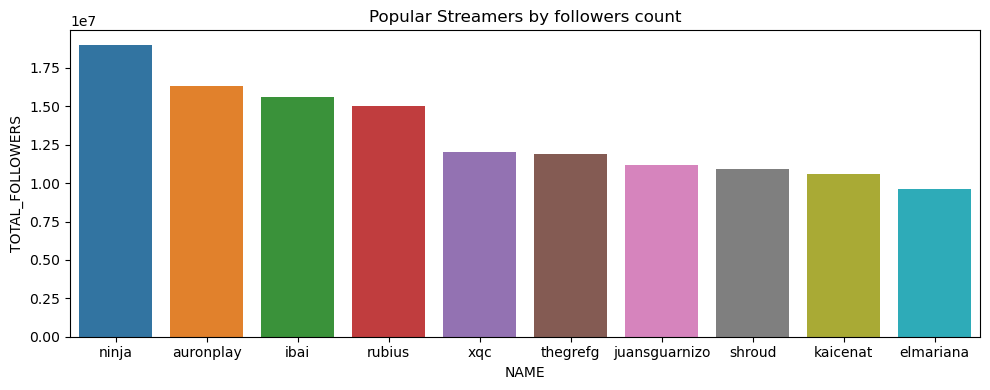

In [5]:
x_df = df.sort_values(by="TOTAL_FOLLOWERS", ascending=False).head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x="NAME", y="TOTAL_FOLLOWERS", data=x_df)
plt.title("Popular Streamers by followers count")
plt.tight_layout()
plt.show()

# 10 Most Populer Streamers by views count

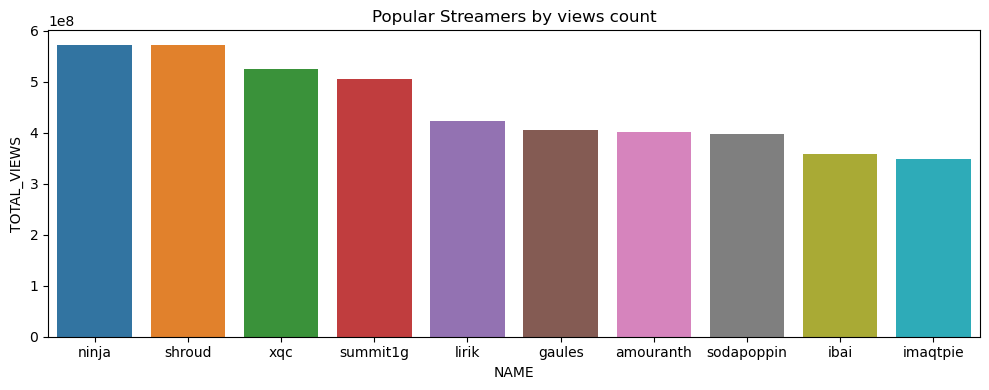

In [6]:
x_df = df.sort_values(by="TOTAL_VIEWS", ascending=False).head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x="NAME", y="TOTAL_VIEWS", data=x_df)
plt.title("Popular Streamers by views count")
plt.tight_layout()
plt.show()

# Are the most streamed games the best ones to get views?

## 10 Most Popular Stream Games

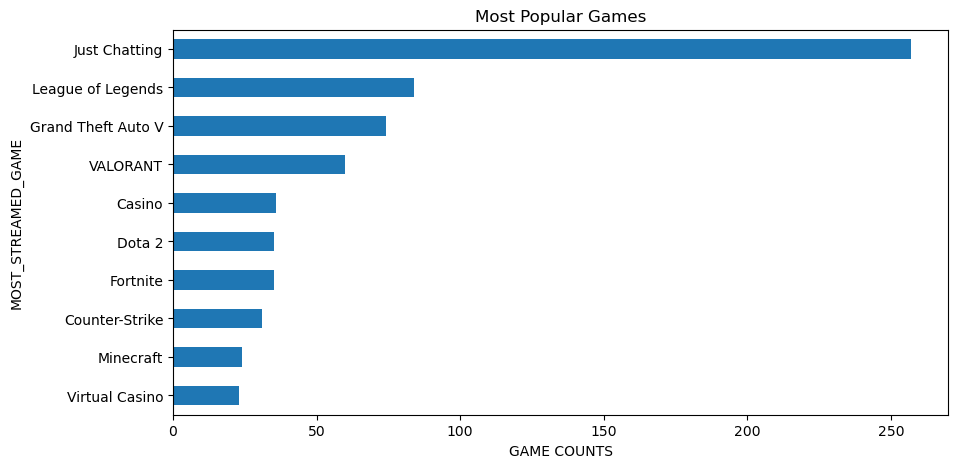

In [7]:
plt.figure(figsize=(10, 5))
df["MOST_STREAMED_GAME"].value_counts().head(10).sort_values(ascending=True).plot(kind="barh")
plt.title("Most Popular Games")
plt.xlabel("GAME COUNTS")
plt.show()

## 10 Most Popular Stream Games by average views

Text(0, 0.5, 'Average viewership')

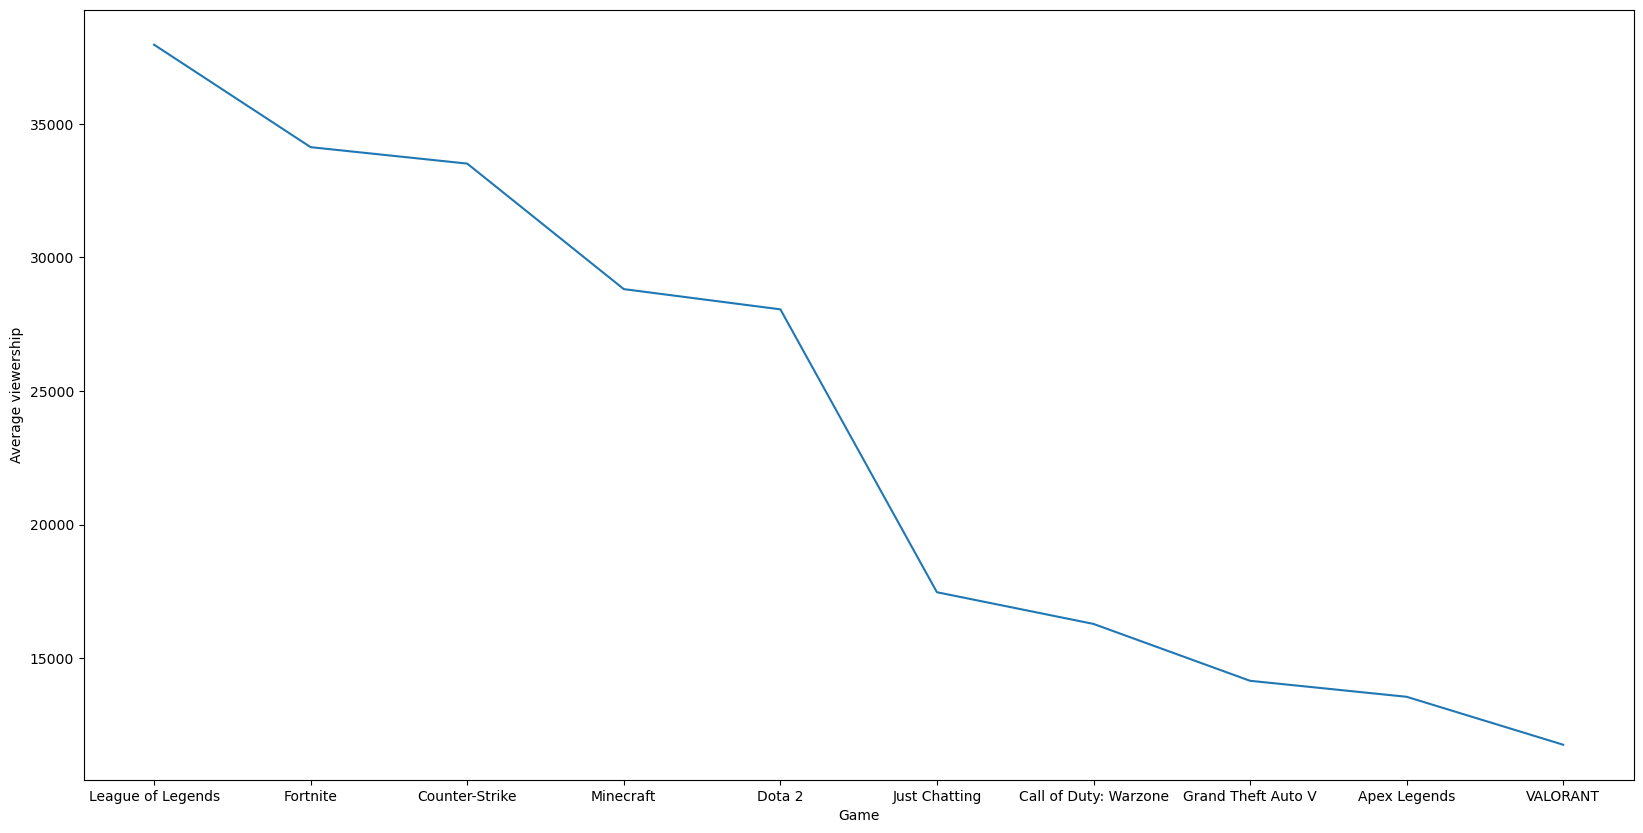

In [8]:
# Filter out rows with zero values in AVG_VIEWERS_PER_STREAM
df_filtered0 = df[(df['AVG_VIEWERS_PER_STREAM'] > 0)]

top_10=df_filtered0["MOST_STREAMED_GAME"].value_counts().head(10)

game_df=df_filtered0[df_filtered0["MOST_STREAMED_GAME"].isin(top_10.index)]

avg_viewers_per_game = game_df.groupby("MOST_STREAMED_GAME")["AVG_VIEWERS_PER_STREAM"].agg('mean')

plt.figure(figsize=(20,10)) 
plt.plot(avg_viewers_per_game.sort_values(ascending=False))
plt.xlabel("Game")
plt.ylabel("Average viewership")

### Analysis & Conclusion:

The analysis of the data suggests that the most streamed games are not necessarily the best ones to get views. While "Just Chatting" is the most streamed category, it does not have the highest average viewership. On the other hand, games like "League of Legends," "Fortnite," and "Counter-Strike," which are also popular, tend to have higher average viewerships. This indicates that streamers might not get the highest viewership by simply streaming the most popular games; instead, they might achieve better results by focusing on games that have a higher average viewership, even if they are not the most streamed.

# Does the language of the stream affect the number of views and followers ?

## Most Languages used by streamers

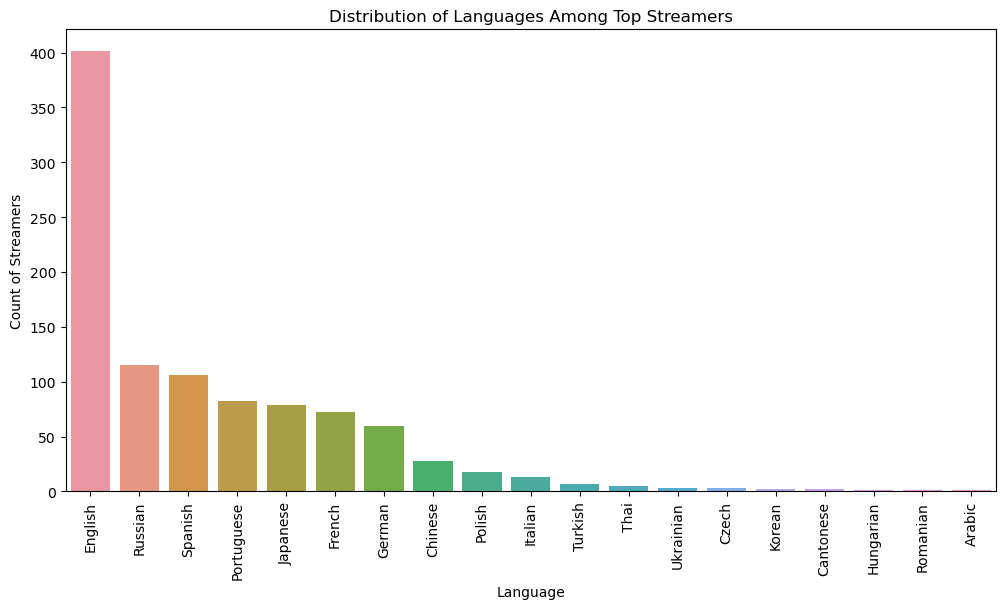

In [9]:
# Distribution of Languages Among Top Streamers
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='LANGUAGE', order=df['LANGUAGE'].value_counts().index)
plt.title('Distribution of Languages Among Top Streamers')
plt.xlabel('Language')
plt.ylabel('Count of Streamers')
plt.xticks(rotation=90)
plt.show()

 ## Average Total Followers by Language

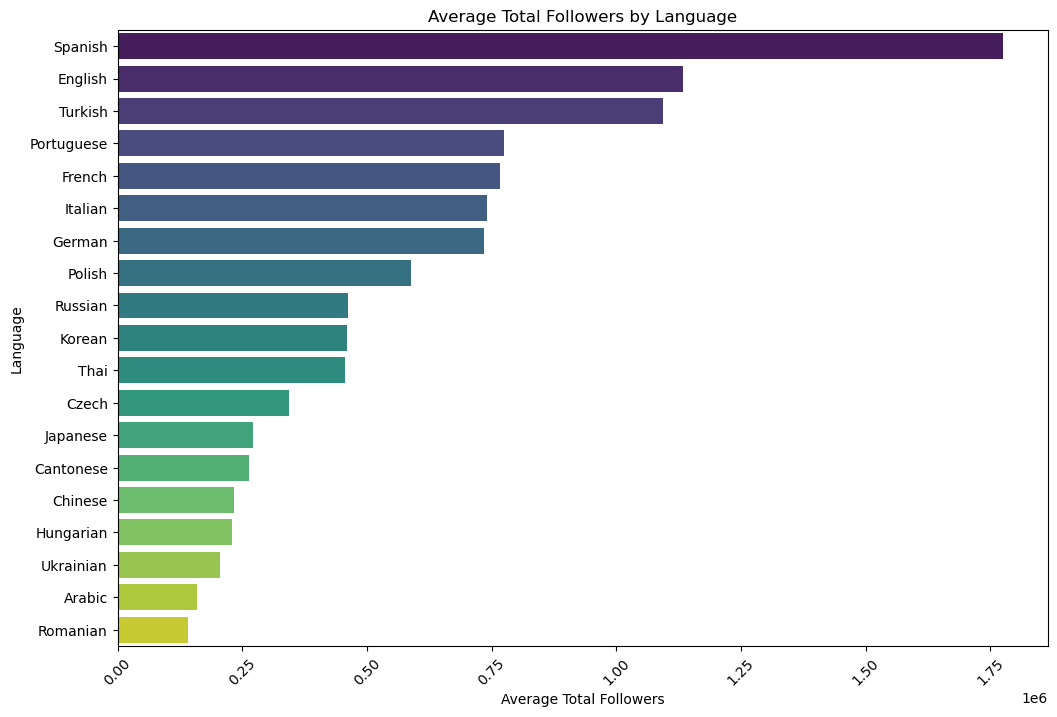

In [10]:
# Filter out rows with zero values in TOTAL_FOLLOWERS
df_filtered_followers = df[(df['TOTAL_FOLLOWERS'] > 0)]

# Calculate the average total followers for each language
followers_by_language = df_filtered_followers.groupby('LANGUAGE')['TOTAL_FOLLOWERS'].mean().reset_index()

# Sort the languages by the average number of followers
followers_by_language = followers_by_language.sort_values(by='TOTAL_FOLLOWERS', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='TOTAL_FOLLOWERS', y='LANGUAGE', data=followers_by_language, palette="viridis")
plt.title('Average Total Followers by Language')
plt.xlabel('Average Total Followers')
plt.ylabel('Language')
plt.xticks(rotation=45)
plt.show()

## The higher number of followers for each language

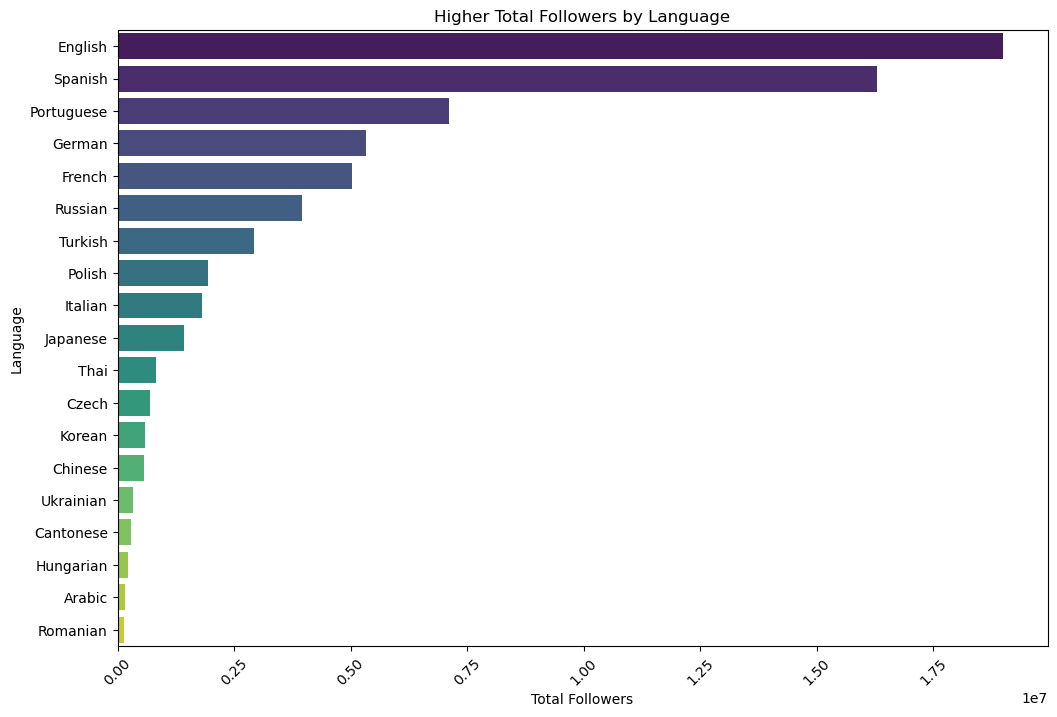

In [11]:
# Calculate the highest total followers for each language
max_followers_by_language = df_filtered_followers.groupby('LANGUAGE')['TOTAL_FOLLOWERS'].max().reset_index()

# Sort the languages by the highest number of followers
max_followers_by_language = max_followers_by_language.sort_values(by='TOTAL_FOLLOWERS', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='TOTAL_FOLLOWERS', y='LANGUAGE', data=max_followers_by_language, palette="viridis")
plt.title('Higher Total Followers by Language')
plt.xlabel('Total Followers')
plt.ylabel('Language')
plt.xticks(rotation=45)
plt.show()

 ## Average Total views by Language

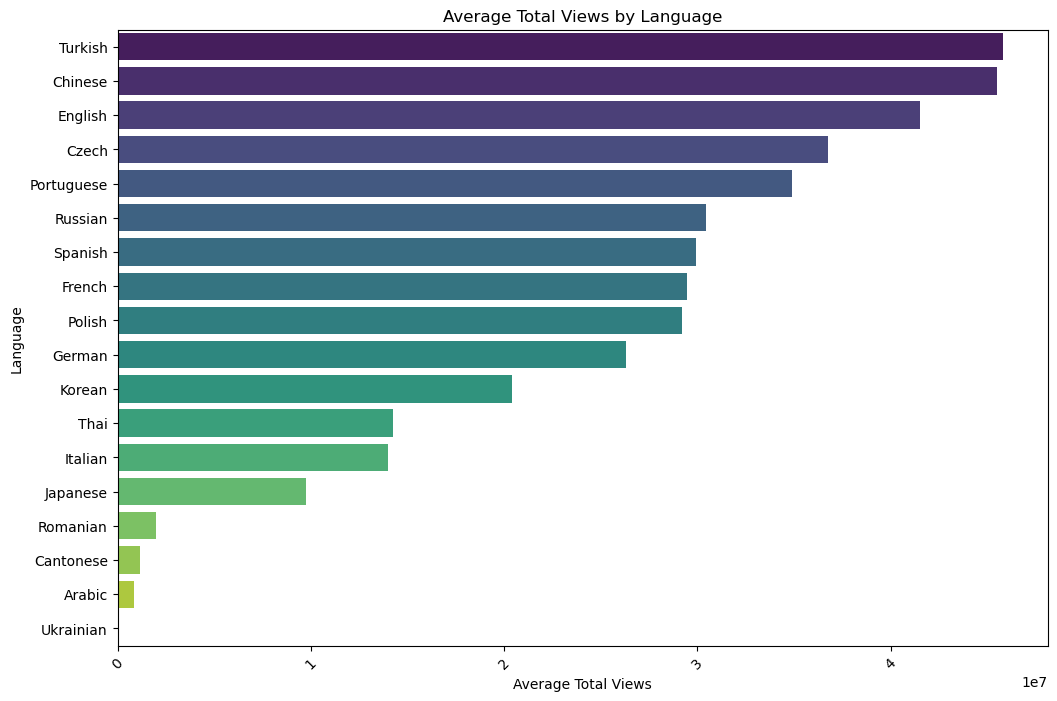

In [12]:
# Filter out rows with zero values in TOTAL_VIEWS
df_filtered_views = df[(df['TOTAL_VIEWS'] > 0)]

# Calculate the average total views for each language
views_by_language = df_filtered_views.groupby('LANGUAGE')['TOTAL_VIEWS'].mean().reset_index()

# Sort the languages by the average number of views
views_by_language = views_by_language.sort_values(by='TOTAL_VIEWS', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='TOTAL_VIEWS', y='LANGUAGE', data=views_by_language, palette="viridis")
plt.title('Average Total Views by Language')
plt.xlabel('Average Total Views')
plt.ylabel('Language')
plt.xticks(rotation=45)
plt.show()

## The higher number of views for each language

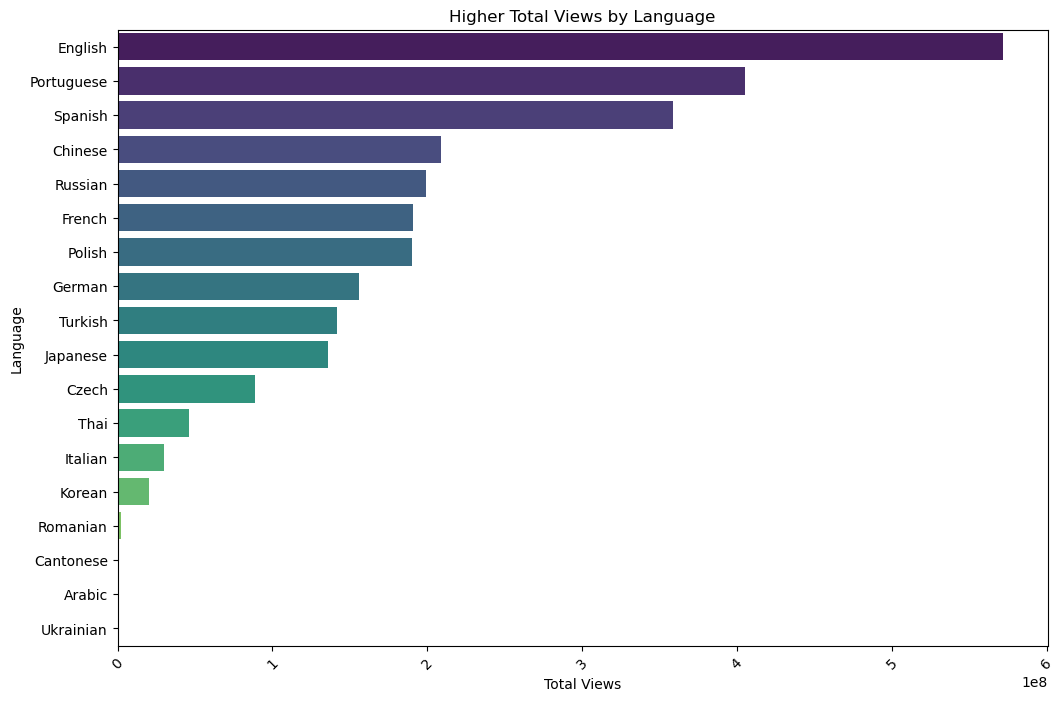

In [13]:
# Calculate the highest total views for each language
max_views_by_language = df_filtered_views.groupby('LANGUAGE')['TOTAL_VIEWS'].max().reset_index()

# Sort the languages by the highest number of views
max_views_by_language = max_views_by_language.sort_values(by='TOTAL_VIEWS', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='TOTAL_VIEWS', y='LANGUAGE', data=max_views_by_language, palette="viridis")
plt.title('Higher Total Views by Language')
plt.xlabel('Total Views')
plt.ylabel('Language')
plt.xticks(rotation=45)
plt.show()

### Analysis & Conclusion:

The analysis of the data suggests that the language of the stream does affect the number of views and followers. While English is the most used language and leads in total views and followers, other languages like Spanish and Portuguese also show high engagement and follower counts. Notably, Turkish streams have the highest average views, indicating that less common languages can also attract substantial viewership. Streamers might consider using or incorporating these languages to potentially increase their reach and engagement.

# Does the Stream duration affect the number of views and followers ?

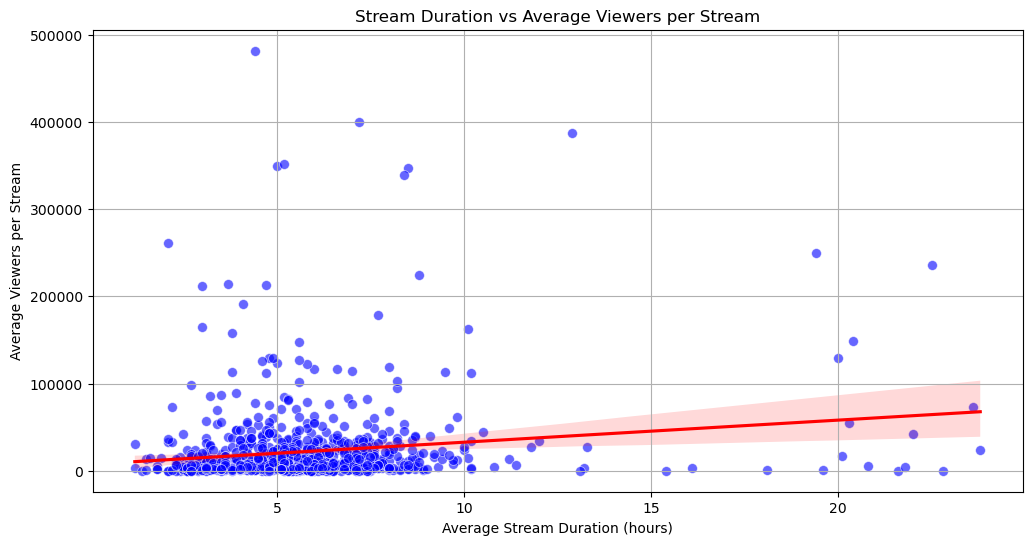

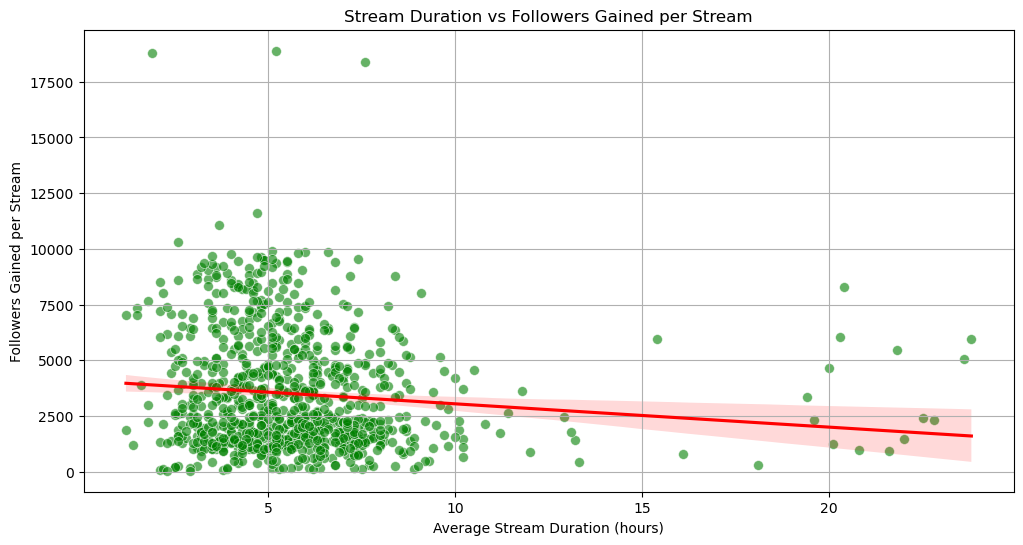

In [14]:
# Filter out rows with zero values in AVERAGE_STREAM_DURATION, TOTAL_VIEWS, and TOTAL_FOLLOWERS
df_filtered = df[(df['AVERAGE_STREAM_DURATION'] > 0) & (df['TOTAL_VIEWS'] > 0) & (df['TOTAL_FOLLOWERS'] > 0)]

# Create scatter plot for AVERAGE_STREAM_DURATION vs AVG_VIEWERS_PER_STREAM
plt.figure(figsize=(12, 6))
sns.scatterplot(x='AVERAGE_STREAM_DURATION', y='AVG_VIEWERS_PER_STREAM', data=df_filtered, color='blue', alpha=0.6, s=50)
sns.regplot(x='AVERAGE_STREAM_DURATION', y='AVG_VIEWERS_PER_STREAM', data=df_filtered, scatter=False, color='red')
plt.title('Stream Duration vs Average Viewers per Stream')
plt.xlabel('Average Stream Duration (hours)')
plt.ylabel('Average Viewers per Stream')
plt.grid(True)
plt.show()

# Create scatter plot for AVERAGE_STREAM_DURATION vs FOLLOWERS_GAINED_PER_STREAM
plt.figure(figsize=(12, 6))
sns.scatterplot(x='AVERAGE_STREAM_DURATION', y='FOLLOWERS_GAINED_PER_STREAM', data=df_filtered, color='green', alpha=0.6, s=50)
sns.regplot(x='AVERAGE_STREAM_DURATION', y='FOLLOWERS_GAINED_PER_STREAM', data=df_filtered, scatter=False, color='red')
plt.title('Stream Duration vs Followers Gained per Stream')
plt.xlabel('Average Stream Duration (hours)')
plt.ylabel('Followers Gained per Stream')
plt.grid(True)
plt.show()

### Analysis & Conclusion:

The graph above illustrates the relationship between stream duration and the average viewers per stream as well as followers gained per stream.

The first part of the graph shows a slight positive correlation between stream duration and average viewers per stream. This suggests that longer streams might attract more viewers on average, although the correlation is weak, as indicated by the wide scatter of data points. Most streamers tend to have shorter streams with fewer viewers, while a few outliers attract significantly higher average viewers.

The second part of the graph shows a slight negative correlation between stream duration and followers gained per stream. This suggests that longer streams might result in fewer followers gained on average, though this correlation is also weak. Most streamers have shorter streams with a moderate number of followers gained, while some outliers gain a significant number of followers regardless of stream duration.

Overall, the analysis indicates that stream duration has some impact on the number of viewers and followers, but it is not a strong determining factor. Other elements, such as content quality, streamer popularity, and engagement strategies, also play crucial roles in attracting viewers and gaining followers.

# What is the best days for gaining followers and views?

## What is the best day to be active to get more views ?

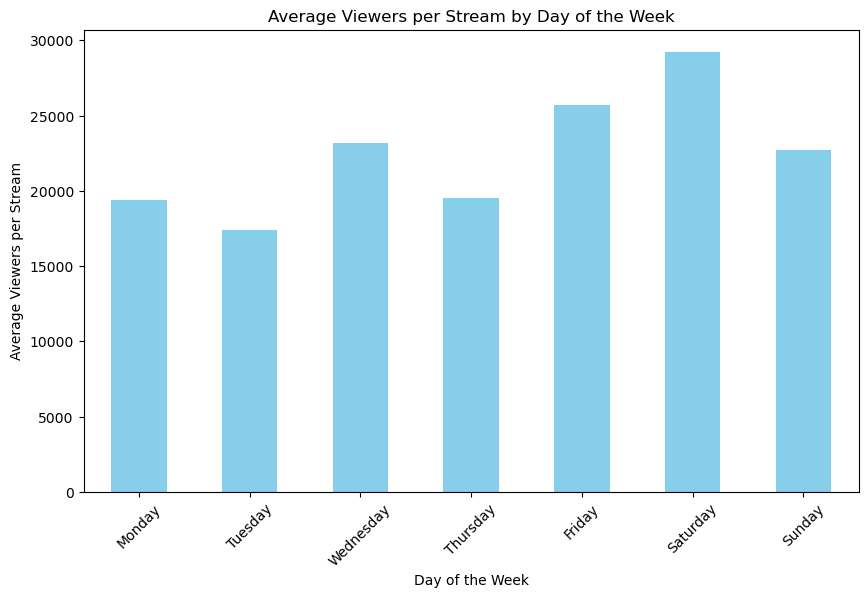

In [15]:
# Filter out rows with missing values in AVG_VIEWERS_PER_STREAM and FOLLOWERS_GAINED_PER_STREAM
df_filtered3 = df[df['AVG_VIEWERS_PER_STREAM'] > 0]

# Group by MOST_ACTIVE_DAY and calculate the average viewers per stream
avg_viewers_by_day = df_filtered3.groupby('MOST_ACTIVE_DAY')['AVG_VIEWERS_PER_STREAM'].mean()

# Reindex to ensure the order of days if they are not in order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_viewers_by_day = avg_viewers_by_day.reindex(days_order)

plt.figure(figsize=[10, 6])
avg_viewers_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Viewers per Stream by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Viewers per Stream')
plt.xticks(rotation=45)
plt.show()

### Analysis

Analysis of the data suggests that the best day to Stream, in terms of average viewers, is Saturday.

## What is the best day to be active to get more followers ?

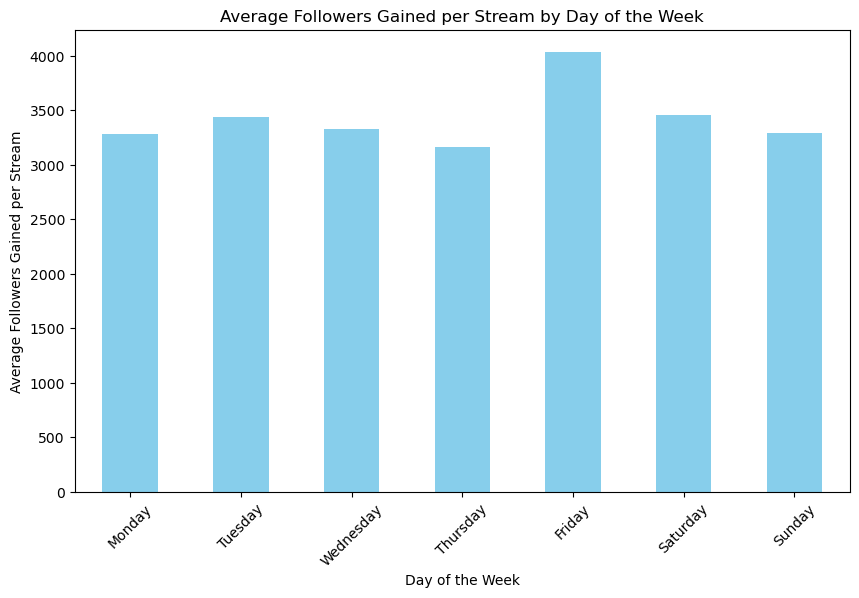

In [16]:
# Filter out rows with missing values in AVG_VIEWERS_PER_STREAM and FOLLOWERS_GAINED_PER_STREAM
df_filtered4 = df[df['FOLLOWERS_GAINED_PER_STREAM'] > 0]
# Group by MOST_ACTIVE_DAY and calculate the average followers gained per stream
avg_followers_by_day = df_filtered4.groupby('MOST_ACTIVE_DAY')['FOLLOWERS_GAINED_PER_STREAM'].mean()

# Reindex to ensure the order of days if they are not in order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_followers_by_day = avg_followers_by_day.reindex(days_order)

plt.figure(figsize=[10, 6])
avg_followers_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Followers Gained per Stream by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Followers Gained per Stream')
plt.xticks(rotation=45)
plt.show()

### Analysis

Analysis of the data suggests that the best day to Stream, in terms of average followers gain, is Friday.

## The best days for gaining follower and viewers at the same time

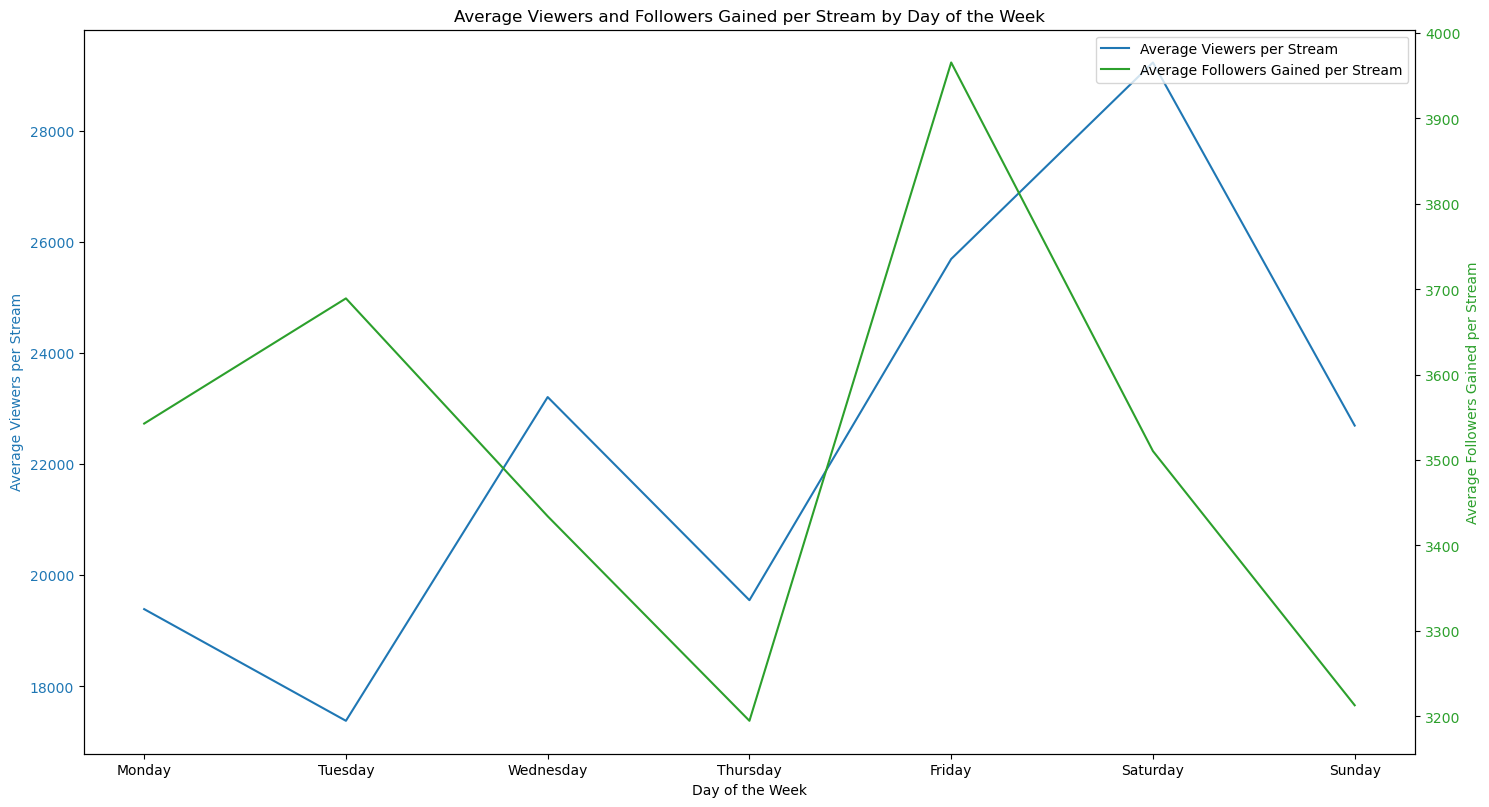

The best day to stream for both gaining followers and getting views is Friday with a combined score of 1.70.


In [17]:
# Filter out rows with missing values in AVG_VIEWERS_PER_STREAM and FOLLOWERS_GAINED_PER_STREAM
df_filtered5 = df[(df['AVG_VIEWERS_PER_STREAM'] > 0) & (df['FOLLOWERS_GAINED_PER_STREAM'] > 0)]

# Group by MOST_ACTIVE_DAY and calculate the average viewers and followers gained per stream
avg_viewers_by_day = df_filtered5.groupby('MOST_ACTIVE_DAY')['AVG_VIEWERS_PER_STREAM'].mean()
avg_followers_by_day = df_filtered5.groupby('MOST_ACTIVE_DAY')['FOLLOWERS_GAINED_PER_STREAM'].mean()

# Reindex to ensure the order of days if they are not in order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_viewers_by_day = avg_viewers_by_day.reindex(days_order)
avg_followers_by_day = avg_followers_by_day.reindex(days_order)

# Normalize the data to combine them
normalized_viewers = (avg_viewers_by_day - avg_viewers_by_day.min()) / (avg_viewers_by_day.max() - avg_viewers_by_day.min())
normalized_followers = (avg_followers_by_day - avg_followers_by_day.min()) / (avg_followers_by_day.max() - avg_followers_by_day.min())

# Combine the normalized scores
combined_score = normalized_viewers + normalized_followers

# Find the best day
best_day = combined_score.idxmax()
best_day_score = combined_score.max()

fig, ax1 = plt.subplots(figsize=[15, 8])
color = 'tab:blue'
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Average Viewers per Stream', color=color)
ax1.plot(days_order, avg_viewers_by_day, label='Average Viewers per Stream', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:green'
ax2.set_ylabel('Average Followers Gained per Stream', color=color)  # We already handled the x-label with ax1
ax2.plot(days_order, avg_followers_by_day, label='Average Followers Gained per Stream', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Otherwise the right y-label is slightly clipped
plt.title('Average Viewers and Followers Gained per Stream by Day of the Week')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

print(f'The best day to stream for both gaining followers and getting views is {best_day} with a combined score of {best_day_score:.2f}.')

# General conclusions

+ The most streamed games are not necessarily the best for gaining views. Games like "League of Legends" and "Fortnite," although not the most streamed, offer higher average viewership.
+ The language used in streams significantly affects both views and followers. English is the most prevalent and leads in total views and followers. However, Spanish, Portuguese, and Turkish also show strong performance, indicating opportunities for non-English streams to attract substantial audiences.
+ Longer stream durations have a slight positive correlation with average viewers per stream but a slight negative correlation with followers gained per stream. This suggests that while longer streams might attract more viewers, they might not necessarily convert to followers.
+ The best day to stream for gaining a higher number of followers and viewers is Friday. However, to maximize the number of followers and viewers, streaming on both Friday and Saturday is the most effective strategy.

# Limitations

There are several limitations to this study including:

+ There is missing information for key metrics like followers and views.
+ The dataset only includes the 1000 most popular streamers on Twitch.
+ The data may not account for temporal changes in streaming trends and viewer preferences.
+ External factors such as marketing efforts, streamer popularity outside of Twitch, collaborations, and other social media presence are not presented in the dataset.
+ There is no information on the chat activity, donations, and viewer retention that could provide a more comprehensive understanding of stream success.